# Problem 1: Analyzing vehicle and pedestrian stops from law enforcement departments across Rhode Island

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data
url = '../../../Data/police_ri.csv'
ri = pd.read_csv(url, parse_dates={'stop_datetime': ['stop_date','stop_time']})

The 'ri' DataFrame contains data on vehicle and pedestrian stops from law enforcement departments across the state of Rhode Island.
This dataset has been obtained from the [Standford Open Police Project](https://openpolicing.stanford.edu/).

In [3]:
ri.head()

,stop_datetime,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20 17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14 10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


**Part 1:** Remove the column that only contains missing values

In [4]:
# show columns with all nan values
ri.columns[ri.isnull().all()]

Index(['county_name'], dtype='object')

In [5]:
ri.drop(['county_name'], axis=1, inplace=True)

**Part 2:** Do men or women speed more often?

In [6]:
speeding_violations = ri[ri.violation == 'Speeding']
speeding_violations.head()

,stop_datetime,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01 17:30:00,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
men_speeding_count = len(speeding_violations[speeding_violations["driver_gender"] == 'M'])
women_speeding_count = len(speeding_violations[speeding_violations["driver_gender"] == 'F'])

speeding_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Speeding Violations': [men_speeding_count, women_speeding_count]
})
speeding_df

,Gender,Speeding Violations
0,Male,32979
1,Female,15482


**Part 3:** Does gender affect who gets searched during a stop?

In [8]:
men_searched_count = len(ri[(ri["driver_gender"] == 'M') & (ri["search_conducted"] == True)])
women_searched_count = len(ri[(ri["driver_gender"] == 'F') & (ri["search_conducted"] == True)])

searched_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Times Stopped': [len(ri[ri['driver_gender'] == 'M']),len(ri[ri['driver_gender'] == 'F'])],
    'Was Searched': [men_searched_count, women_searched_count]
})
searched_df["Search Rate"] = searched_df["Was Searched"] / searched_df["Times Stopped"]
searched_df

,Gender,Times Stopped,Was Searched,Search Rate
0,Male,62895,2725,0.043326
1,Female,23511,471,0.020033


**Part 4:** Why is search_type missing so often?

In [9]:
ri.search_conducted.mean()

0.03483720473942948

<p> because a search is not often coducted (only about 3.5% of the time)</p>

**Part 5:** During a search, how often is the driver frisked?

In [10]:
ri['search_type'].value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [11]:
# single out stops with searches
searches_df = ri[ri['search_conducted'] == True]

In [12]:
# search the search_type column for the word 'Frisk' and get the mean (the result is a boolean series so we can get the mean) 
frisk_rate = searches_df['search_type'].str.contains('Frisk', na=False).mean()
frisk_rate

0.08573216520650813

<p>A frisk is conducted on about 8.6% of searches</p>

**Part 6:**  Which year had the least number of stops?

In [13]:
year_stop_counts = ri['stop_datetime'].dt.year.value_counts() # dt year is a series so we can get the value counts
min(year_stop_counts.index) # the year is the index so we can get the min and max

2005

**Part 7:** How does drug activity change by time of day?

<AxesSubplot:title={'center':'Drug Related Stops by Hour'}, xlabel='stop_datetime'>

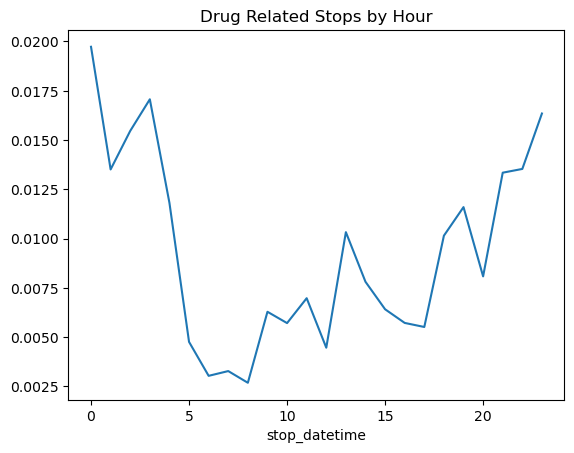

In [14]:
# group by hour and count the drug-related stops
hourly_drug_rate = ri.groupby(ri['stop_datetime'].dt.hour)['drugs_related_stop'].mean()

hourly_drug_rate.plot(title='Drug Related Stops by Hour') # plot the results

**Part 8:** Do most stops occur at night?

<AxesSubplot:title={'center':'Stops by Time of Day'}, xlabel='stop_datetime'>

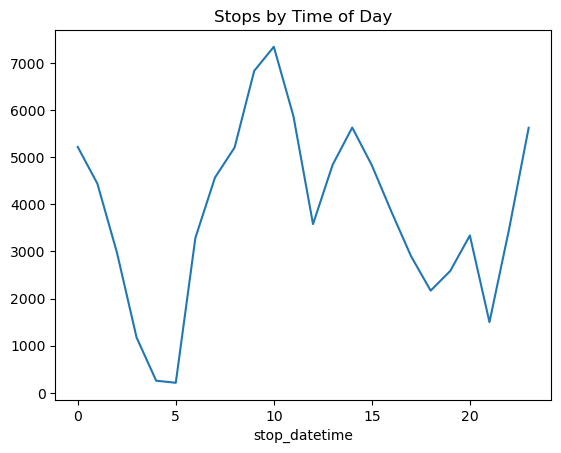

In [15]:
# group by hour and count the stops
hourly_stop_rate = ri.groupby(ri['stop_datetime'].dt.hour)['stop_datetime'].count()

# plot the results
hourly_stop_rate.plot(title='Stops by Time of Day')

**Part 9:** Find the bad data in the stop_duration column and fix it

In [16]:
ri['stop_duration'].value_counts() # show counts of the unique values

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [17]:
# replace the values with the correct values (assuming the 1 and 2 mean 1 and 2 minutes)
ri['stop_duration'].replace(['1'], '0-15 Min', inplace=True)
ri['stop_duration'].replace(['2'], '0-15 Min', inplace=True)

**Part 10:** What is the mean stop_duration for each violation_raw?

In [28]:
ri.groupby('violation_raw')['stop_duration'].value_counts(normalize=True).unstack() # group by violation and stop duration and get the normalized value counts

stop_duration,0-15 Min,16-30 Min,30+ Min
violation_raw,,,
APB,0.468354,0.303797,0.227848
Call for Service,0.421418,0.335131,0.243451
Equipment/Inspection Violation,0.832396,0.124592,0.043013
Motorist Assist/Courtesy,0.586207,0.290640,0.123153
Other Traffic Violation,0.725099,0.194157,0.080745
Registration Violation,0.705420,0.234266,0.060315
Seatbelt Violation,0.902778,0.084350,0.012873
Special Detail/Directed Patrol,0.660692,0.249695,0.089613
Speeding,0.846316,0.141304,0.012381


**EXTRA:** Compare the age distributions for each violation